<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/sl/30_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Klasyfikator wieloklasowy - Image Recognition 

Celem tego notebook'a jest budowa modelu klasyfikacji obrazów przedstawiających różne elementy ubioru. W tym celu wykorzystamy kolejny popularny zbiór danych w dziedzinie sieci neuronowych: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST to zestaw danych z obrazkami artykułów Zalando - składający się z zestawu treningowego 60 000 przykładów i zestawu testowego 10 000 przykładów. Każdy przykład to obraz w skali szarości 28 x 28, powiązany z jedną etykietą z 10 klas.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

#### Przykładowe obrazy
<img src='https://storage.cloud.google.com/esmartdata-courses-files/ann-course/zalando10x10.jpeg' width=600>




### Spis treści:
1. [Import bibliotek](#a0)
2. [Załadowanie danych i wstępna eksploracja](#a1)
3. [Budowa modelu](#a2)
4. [Ocena modelu](#a3)
5. [Predykcja na podstawie modelu](#a4)
6. [Eksploracja predykcji](#a5)
7. [Błędnie sklasyfikowane obrazy](#a6)
8. [Klika możliwości poprawy modeli](#a7)



### <a name='a0'></a> 1. Import bibliotek

In [1]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets.fashion_mnist import load_data

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set(font_scale=1.3)

TensorFlow 2.x selected.


### <a name='a1'></a> 2. Załadowanie danych i wstępna eksploracja

In [0]:
(X_train, y_train), (X_test, y_test) = load_data()

In [16]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [17]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [18]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

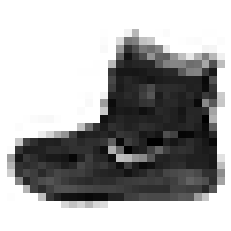

In [19]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

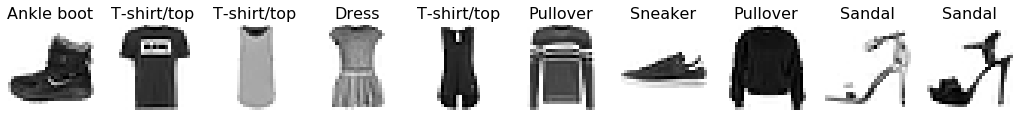

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [0]:
X_train = X_train / 255.
X_test = X_test / 255.

In [13]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

### <a name='a2'></a> 3. Budowa modelu

In [25]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
classifier.score(X_test, y_test)

0.8828

In [0]:
y_pred = classifier.predict(X_test)

In [28]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

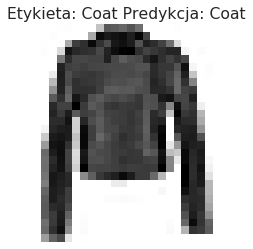

In [51]:
#@title Wybierz indeks zdjęcia:
idx = 4095 #@param {type: 'slider', min:0, max:10000}

from PIL import Image, ImageOps

if y_pred[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

data = (X_test[idx] * 255).astype(np.uint8)
data = data.reshape(28, 28)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))

plt.imshow(img)
plt.title(f'Etykieta: {class_names[y_test[idx]]} Predykcja: {class_names[y_pred[idx]]}')
plt.axis('off')
plt.show()

### <a name='a6'></a> 7. Błędnie sklasyfikowane obrazy

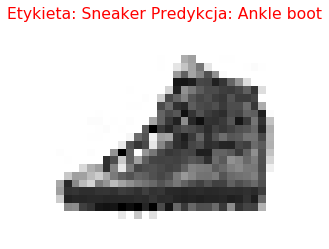

In [59]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
    if y_pred[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}

for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 815 #@param {type: 'slider', min:0, max:1119}

if y_pred[index_mapper[idx]] == y_test[index_mapper[idx]]:
    color = 'green'
else:
    color = 'red'

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
data = data.reshape(28, 28)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))

plt.imshow(img)
plt.title(f'Etykieta: {class_names[y_test[index_mapper[idx]]]} Predykcja: {class_names[y_pred[index_mapper[idx]]]}', color=color)
plt.axis('off')
plt.show()